In [1]:
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [53]:
data_path = "../../resources/science-data/"
gw_df = pd.read_csv(data_path + "global_warming.csv")
gw_meta_df = pd.read_csv(data_path + "global_warming_meta.csv")
fips_df = pd.read_csv(data_path + "fips_county.csv")
mask_df = pd.read_csv(data_path + "mask-use-by-county.csv")
rona_df = pd.read_csv(data_path + "jh_cases_deaths.csv")

In [55]:
gw_df = gw_df.groupby('GeoType').get_group('County')
gw_df = gw_df[['GeoType', 'GEOID', 'happening', 'happeningOppose', 'human', 'humanOppose']]
gw_df = gw_df.rename(columns={'happening': 'GW-Happening', 'happeningOppose': 'GW-Not-Happening', 'human': 'GW-Human-Caused', 'humanOppose': 'GW-Not-Human-Caused'})

In [56]:
mask_df = mask_df.rename(columns={'COUNTYFP': 'County', 'NEVER': 'Mask-Never', 'RARELY': 'Mask-Rarely', 'SOMETIMES': 'Mask-Sometimes', 'FREQUENTLY': 'Mask-Frequent', 'ALWAYS': 'Mask-Always'})

In [57]:
rona_df = rona_df[['fips_code', 'total_population', 'confirmed', 'confirmed_per_100000', 'deaths', 'deaths_per_100000']]
rona_df = rona_df.rename(columns={'total_population': 'Population', 'confirmed': 'Cases', 'confirmed_per_100000': 'Cases Per 100k', 'deaths': 'Deaths', 'deaths_per_100000': 'Deaths Per 100k' })
rona_df = rona_df.dropna(subset=['fips_code', 'Population'])
rona_df['fips_code'] = rona_df['fips_code'].astype('int32')
rona_df['Population'] = rona_df['Population'].astype('int32')

In [121]:
df = fips_df.merge(mask_df, how='inner', left_on='FIPS', right_on='County')
df = df.drop(['County'], axis=1)
df.head()

,FIPS,County Name,State Abbr,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always
0,1001,Autauga,AL,0.053,0.074,0.134,0.295,0.444
1,1003,Baldwin,AL,0.083,0.059,0.098,0.323,0.436
2,1005,Barbour,AL,0.067,0.121,0.120,0.201,0.491
3,1007,Bibb,AL,0.020,0.034,0.096,0.278,0.572
4,1009,Blount,AL,0.053,0.114,0.180,0.194,0.459


In [122]:
df = df.merge(gw_df, how='inner', left_on='FIPS', right_on='GEOID')
df = df.drop(['GeoType', 'GEOID'], axis=1)
df.head()

,FIPS,County Name,State Abbr,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always,GW-Happening,GW-Not-Happening,GW-Human-Caused,GW-Not-Human-Caused
0,1001,Autauga,AL,0.053,0.074,0.134,0.295,0.444,58.925,17.910,46.619,41.905
1,1003,Baldwin,AL,0.083,0.059,0.098,0.323,0.436,60.590,19.028,46.056,41.122
2,1005,Barbour,AL,0.067,0.121,0.120,0.201,0.491,66.975,10.476,51.662,38.378
3,1007,Bibb,AL,0.020,0.034,0.096,0.278,0.572,57.679,18.117,44.925,43.474
4,1009,Blount,AL,0.053,0.114,0.180,0.194,0.459,52.372,23.976,43.147,43.863


In [123]:
df = df.merge(rona_df, how='inner', left_on='FIPS', right_on='fips_code')
df = df.drop(['fips_code'], axis=1)
df.head()

,FIPS,County Name,State Abbr,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always,GW-Happening,GW-Not-Happening,GW-Human-Caused,GW-Not-Human-Caused,Population,Cases,Cases Per 100k,Deaths,Deaths Per 100k
0,1001,Autauga,AL,0.053,0.074,0.134,0.295,0.444,58.925,17.910,46.619,41.905,55200,2048,3710.14,31,56.16
1,1003,Baldwin,AL,0.083,0.059,0.098,0.323,0.436,60.590,19.028,46.056,41.122,208107,6637,3189.22,69,33.16
2,1005,Barbour,AL,0.067,0.121,0.120,0.201,0.491,66.975,10.476,51.662,38.378,25782,1031,3998.91,9,34.91
3,1007,Bibb,AL,0.020,0.034,0.096,0.278,0.572,57.679,18.117,44.925,43.474,22527,828,3675.59,14,62.15
4,1009,Blount,AL,0.053,0.114,0.180,0.194,0.459,52.372,23.976,43.147,43.863,57645,1925,3339.40,25,43.37


In [61]:
states_gp = df.groupby('State Abbr')
states_df = states_gp[['Population', 'Cases', 'Deaths']].sum()
states_df[['Mask-Never', 'Mask-Rarely', 'Mask-Sometimes', 'Mask-Frequent', 'Mask-Always', 'GW-Happening', 'GW-Not-Happening', 'GW-Human-Caused', 'GW-Not-Human-Caused', 'Cases Per 100k', 'Deaths Per 100k']] = states_gp[['Mask-Never', 'Mask-Rarely', 'Mask-Sometimes', 'Mask-Frequent', 'Mask-Always', 'GW-Happening', 'GW-Not-Happening', 'GW-Human-Caused', 'GW-Not-Human-Caused', 'Cases Per 100k', 'Deaths Per 100k']].mean()
states_df = states_df.reset_index()

states_df.head(5)

,State Abbr,Population,Cases,Deaths,Mask-Never,Mask-Rarely,Mask-Sometimes,Mask-Frequent,Mask-Always,GW-Happening,GW-Not-Happening,GW-Human-Caused,GW-Not-Human-Caused,Cases Per 100k,Deaths Per 100k
0,AK,714912,11940,67,0.055522,0.059522,0.081913,0.319304,0.483609,72.872261,11.300739,58.635913,29.760043,1276.441739,4.209130
1,AL,4864680,183276,2866,0.081567,0.081090,0.146612,0.215343,0.475313,61.374030,15.689060,48.144910,40.633254,4015.786418,78.614925
2,AR,2990671,101993,1782,0.090920,0.087253,0.138360,0.220627,0.462867,63.719840,15.902413,48.793080,38.624640,3490.354800,69.696000
3,AZ,6946685,235881,5864,0.049667,0.053200,0.094667,0.147333,0.655000,68.731667,13.842467,54.393600,33.207133,3454.823333,104.264000
4,CA,39148760,899799,17317,0.032310,0.030724,0.063690,0.158603,0.714638,74.108759,10.693552,59.426362,29.754983,1807.263793,28.753103


In [87]:
def create_scatter(x_values, y_values, title, xlabel, ylabel, alpha):
    plt.scatter(x_values, y_values, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
    plt.plot(x_values, x_values * slope + intercept)
    print(f"r-squared: {round(r_value ** 2, 3)}")

r-squared: 0.066


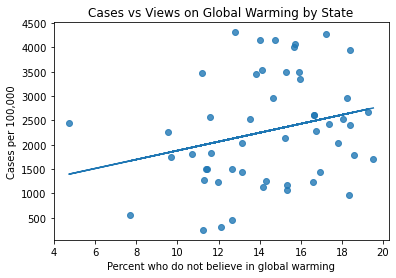

In [124]:
gw_skeptic = states_df['GW-Not-Happening']
create_scatter(gw_skeptic, states_df['Cases Per 100k'], 'Cases vs Views on Global Warming by State', 'Percent who do not believe in global warming', 'Cases per 100,000', 0.8)

r-squared: 0.183


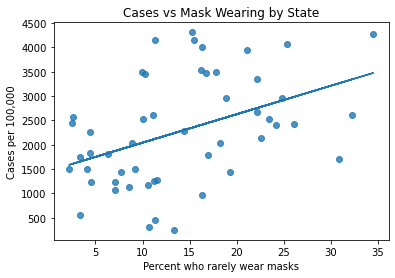

In [114]:
mask_skeptic = 100 * (states_df['Mask-Never'] + states_df['Mask-Rarely'])
create_scatter(mask_skeptic, states_df['Cases Per 100k'], 'Cases vs Mask Wearing by State', 'Percent who rarely wear masks', 'Cases per 100,000', 0.8)

In [115]:
def clean_outliers(df, column):
    q2 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q2
    return df.loc[(df[column] >= q2 - iqr * 1.5) & (df[column] <= q3 + iqr * 1.5)]

In [116]:
no_outliers_df = clean_outliers(df, 'Population')
no_outliers_df = clean_outliers(no_outliers_df, 'Cases Per 100k')

r-squared: 0.022


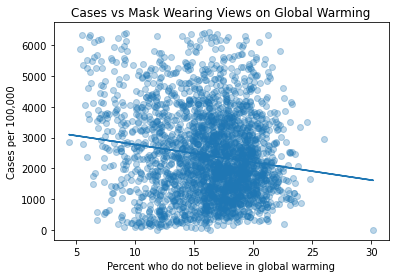

In [117]:
gw_skeptic = no_outliers_df['GW-Not-Happening']
create_scatter(gw_skeptic, no_outliers_df['Cases Per 100k'], 'Cases vs Mask Wearing Views on Global Warming', 'Percent who do not believe in global warming', 'Cases per 100,000', 0.3)

r-squared: 0.03


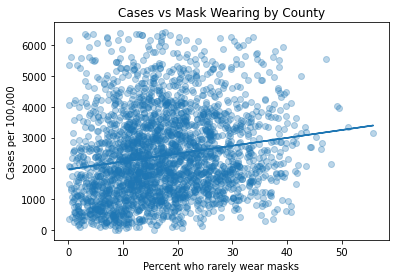

In [118]:
mask_skeptic = 100 * (no_outliers_df['Mask-Never'] + no_outliers_df['Mask-Rarely'])
create_scatter(mask_skeptic, no_outliers_df['Cases Per 100k'], 'Cases vs Mask Wearing by County', 'Percent who rarely wear masks', 'Cases per 100,000', 0.3)

r-squared: 0.146


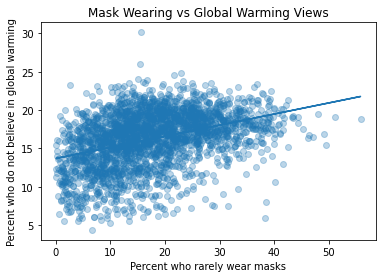

In [120]:
create_scatter(mask_skeptic, gw_skeptic, 'Mask Wearing vs Global Warming Views', 'Percent who rarely wear masks', 'Percent who do not believe in global warming', 0.3)